In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Flatten is used to convert the higher dimentional array into 1d array

In [14]:
# Handwritten digits data from 0, 9 
(x_train, y_train),(x_test, y_test)=keras.datasets.mnist.load_data()

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train[0].shape

(28, 28)

In [17]:
y_train.shape

(60000,)

In [19]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

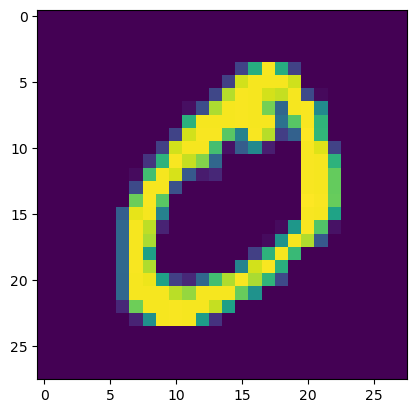

In [23]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [24]:
# Converting the data into similer range
x_train = x_train/255
x_test = x_test/255

In [25]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [26]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\MR OSMAN\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [38]:
history=model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0129 - val_loss: 0.1014
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0110 - val_loss: 0.1081
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0079 - val_loss: 0.1035
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0059 - val_loss: 0.1024
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0099 - val_loss: 0.1021
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0050 - val_loss: 0.1133
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0052 - val_loss: 0.1101
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0048 - val_loss: 0.1224
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0044 - val_loss: 0.1164
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0036 - val_loss: 0.1250


In [34]:
y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [35]:
y_pred=y_prob.argmax(axis=1)

In [37]:
import sklearn
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9772

In [39]:
import matplotlib.pyplot as plt

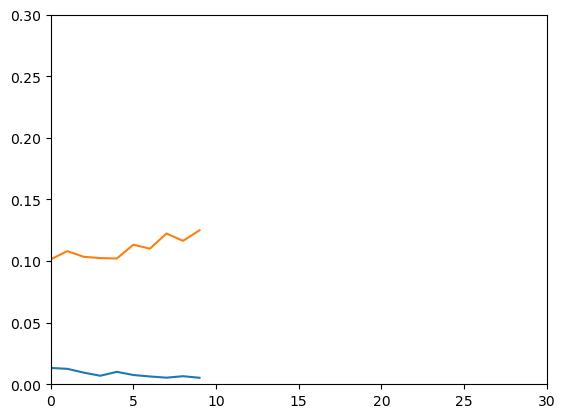

In [48]:
plt.xlim(0,30)
plt.ylim(0,0.30)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

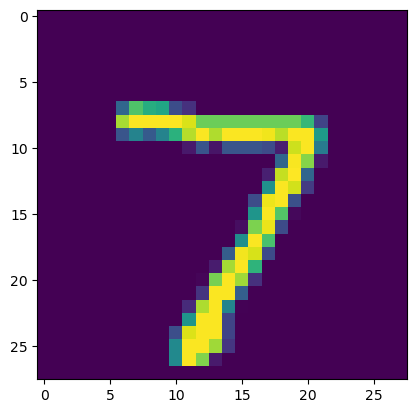

In [50]:
plt.imshow(x_test[0])

In [51]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([7], dtype=int64)

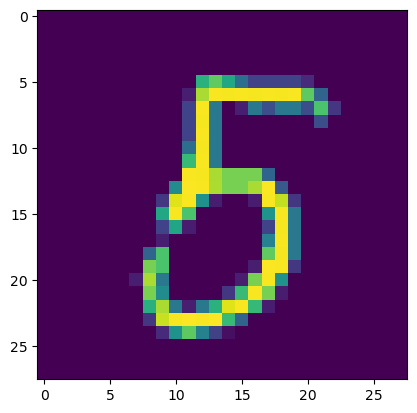

In [52]:
plt.imshow(x_test[45])

In [53]:
model.predict(x_test[45].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([5], dtype=int64)